In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

1. Resuelva la siguiente integral definida con el primer método de integración por Montecarlo usando 100, 1000, 10000, 100000, 1000000 y 10000000 puntos. Compárelo con su valor real=1.
$$
\int_1^e\frac{1}{x}dx
$$

In [3]:
def f(x):
    return 1/x

In [23]:
# Definimos el primer método de integración Montecarlo
def Montecarlo1(f,a,b,N):
    u = np.random.uniform(a,b,N) # 'N' Números aleatrorios uniformemente distribuidos entre 0 y 1
    y = f(u) #Evaluar los puntos 'u' en la función a integrar 
    return np.mean(y)*(b-a) #Aproximación de la integral

In [24]:
N = np.logspace(2,7,6).astype('int') #[10**1, 10**2, ..., 10**5]
N

array([     100,     1000,    10000,   100000,  1000000, 10000000])

In [26]:
for n in N:
    print(n)

100
1000
10000
100000
1000000
10000000


In [28]:
b = np.exp(1)
b

2.718281828459045

In [31]:
tabla = pd.DataFrame(index = N, columns = ['Integral'])
for n in N:
    tabla.loc[n] = Montecarlo1(f,1,b,n)
tabla['Error absoluto'] = np.abs(tabla['Integral']- 1)
tabla['Error relativo'] = 1/np.sqrt(N)
tabla

,Integral,Error absoluto,Error relativo
100,1.000652,0.000652,0.100000
1000,1.005533,0.005533,0.031623
10000,1.00439,0.00439,0.010000
100000,1.000992,0.000992,0.003162
1000000,1.00009,0.00009,0.001000
10000000,1.00007,0.00007,0.000316


In [22]:
np.exp(1)

2.718281828459045

2. Encuentre el volumen de una copa descrita como sigue:

In [3]:
def copa(th,r,z):
    C1 = (z>0)*(r>=0.9*z)*(r<=1.1*z)*(z<=1)
    C2 = (z<=-1.5)*(r<0.5)*(z>=-1.6)
    C3 = (r<0.1)*(z<=0)*(z>-1.5)
    return C1 | C2 | C3

Use límites para $-1.6\leq z\leq 1$, $0\leq r \leq 2$ y $-\pi\leq\theta\leq\pi$. Con puntos desde $10^2$ hasta $10^7$, mostrando en una tabla la acotación del error relativo a priori.

In [3]:
def copaE(th,z):
    C1 = (z>0)*(1.1*z)*(z<=1)
    C2 = (z<=-1.5)*(0.5)*(z>=-1.6)
    C3 = 0.1*(z<=0)*(z>-1.5)
    return C1+C2+C3

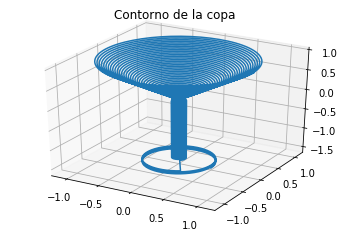

In [4]:
th=np.linspace(-np.pi*1000000,1000000*np.pi,10000)
z=np.linspace(-1.6,1,10000)

r1=copaE(th,z)

x1=r1*np.cos(th)
y1=r1*np.sin(th)

fig = plt.figure()
ax=fig.gca(projection='3d')
plt.title('Contorno de la copa')
ax.plot(x1,y1,z)

In [4]:
np.random.uniform?

In [5]:
th=np.random.uniform(-np.pi,np.pi,1000)
r=np.random.uniform(0,2,1000)
z=np.random.uniform(-1.6,1,1000)
b=copa(th,r,z)
altura=1-(-1.6)
Ab=np.pi*2**2
AR=altura*Ab
AR*np.mean(b)

1.4702653618800232

3. Dada la función
$$
\frac{dy}{dx}=e^{-x^2+1}\cos(13x)+3
$$

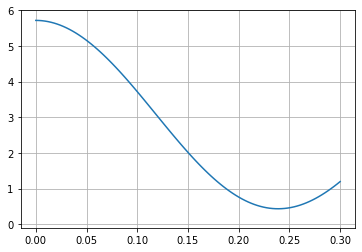

In [5]:
x=np.linspace(0,0.3,100)
dy=np.exp(-x**2+1)*np.cos(13*x)+3
plt.plot(x,dy)
plt.ylim([-0.1,6])
plt.grid()

3.1 Encuentre $y(0.1)$ con el primer método de integración por Montecarlo conociendo $y(0)=1$. Use $10^7$ puntos.

In [32]:
def f3(x):
    return np.exp(-x**2+1)*np.cos(13*x)+3

In [33]:
def Montecarlo1(f,a,b,N):
    u = np.random.uniform(a,b,N) # 'N' Números aleatrorios uniformemente distribuidos entre 0 y 1
    y = f(u) #Evaluar los puntos 'u' en la función a integrar 
    return np.mean(y)*(b-a) #Aproximación de la integral

In [34]:
Montecarlo1(f3,0,0.1,10**7)

0.5009950844939289

In [36]:
y_01 = Montecarlo1(f3,0,0.1,10**7) + 1
y_01

1.5010145672541695

3.2 Encuentre de igual forma $y(0.2)$ de dos formas, una conociendo $y(0)$ y otra conociendo $y(0.1)$, finalmente compare las integrales en una tabla usando desde $10^2$ hasta $10^7$ puntos.

#### Forma 1

In [39]:
y_02 = Montecarlo1(f3,0,0.2,10**7) + 1
y_02

1.710441328123101

#### Forma 2

In [38]:
y_02_2 = Montecarlo1(f3,0.1,0.2,10**7) + y_01
y_02_2

1.7102886943708726

### Comparación de integrales

In [ ]:
tabla = pd.DataFrame(index = N, columns = ['Función 1', 'Función 2'])
for n in N:
    tabla.loc[n, 'Función 1'] = Montecarlo(f3,0,0.2.1,n)
    tabla.loc[n, 'Función 2'] = Montecarlo(f3,2,2.1,n)
tabla['Error relativo'] = 1/np.sqrt(N)
tabla